In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss

In [3]:
def plot_dist(mu, sd, color=None, shade=True, **kwargs):

    plt.plot(x, ss.norm(loc=mu, scale=sd).pdf(x), color=color, **kwargs, alpha=.8)

    if shade:
        plt.fill_between(x, 0.0, ss.norm(loc=mu, scale=sd).pdf(x), alpha=0.3, color=color)

    sns.despine()

In [4]:
def get_posterior(mu1, sd1, mu2, sd2):
    var1, var2 = sd1**2, sd2**2
    return mu1 + (var1/(var1+var2))*(mu2 - mu1), np.sqrt((var1*var2)/(var1+var2))

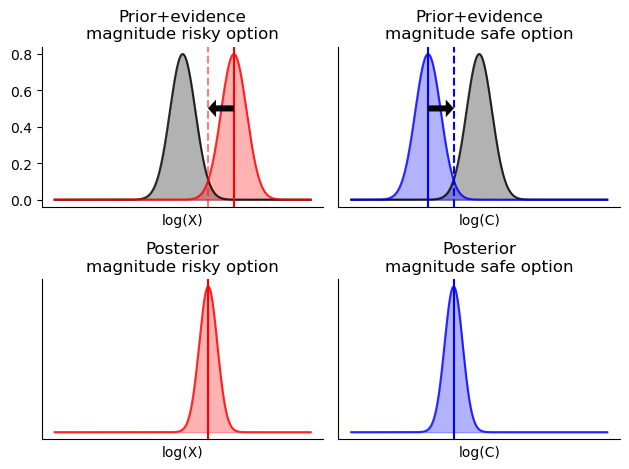

In [13]:
x = np.linspace(0, 10, 1000)

mu_prior, std_prior = 5., .5
mu_evidence_safe, std_evidence_safe = 3.0, .5
# mu_evidence_risky, std_evidence_risky = 7.0, .5
mu_evidence_risky, std_evidence_risky = 7.0, .5
mu_posterior_risky, std_posterior_risky = get_posterior(mu_evidence_risky, std_evidence_risky, mu_prior, std_prior)
mu_posterior_safe, std_posterior_safe = get_posterior(mu_evidence_safe, std_evidence_safe, mu_prior, std_prior)

ax = plt.subplot(221)
plt.title('Prior+evidence\nmagnitude risky option')
plot_dist(mu_prior, std_prior, color='black', label='Prior')
plot_dist(mu_evidence_risky, std_evidence_risky, color='red', label='Evidence risky option')
ax.annotate('', xytext=(mu_evidence_risky, .5), xy=(mu_posterior_risky, 0.5), arrowprops={"color":"black", "linewidth":.25, "headlength":5.5})
plt.axvline(mu_evidence_risky, c='red', ls='-')
plt.axvline(mu_posterior_risky, c='red', ls='--', alpha=.5)
plt.xlabel('log(X)')
plt.xticks([])

ax = plt.subplot(222)
plt.title('Prior+evidence\nmagnitude safe option')
plot_dist(mu_prior, std_prior, color='black', label='Prior')
plot_dist(mu_evidence_safe, std_evidence_safe, color='blue', label='Evidence safe option')
ax.annotate('', xytext=(mu_evidence_safe, .5), xy=(mu_posterior_safe, 0.5), arrowprops={"color":"black", "linewidth":.25, "headlength":5.5})
plt.axvline(mu_evidence_safe, c='blue', ls='-')
plt.axvline(mu_posterior_safe, c='blue', ls='--')
plt.xlabel('log(C)')
plt.yticks([])
plt.xticks([])

plt.subplot(223)
plt.title('Posterior\nmagnitude risky option')
plot_dist(mu_posterior_risky, std_posterior_risky, color='red', label='Evidence risky option')
plt.axvline(mu_posterior_risky, c='red', ls='-')
plt.xlabel('log(X)')
plt.yticks([])
plt.xticks([])

ax = plt.subplot(224)
plt.title('Posterior\nmagnitude safe option')
plot_dist(mu_posterior_safe, std_posterior_safe, color='blue', label='Evidence risky option')
plt.axvline(mu_posterior_safe, c='blue', ls='-')
plt.xlabel('log(C)')
plt.yticks([])
plt.xticks([])

plt.tight_layout()